<a href="https://colab.research.google.com/github/DarshiniSivakumar/CROWD_FLOW_FAIRNESS_PROJECT/blob/main/CrowdFlowFairness_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

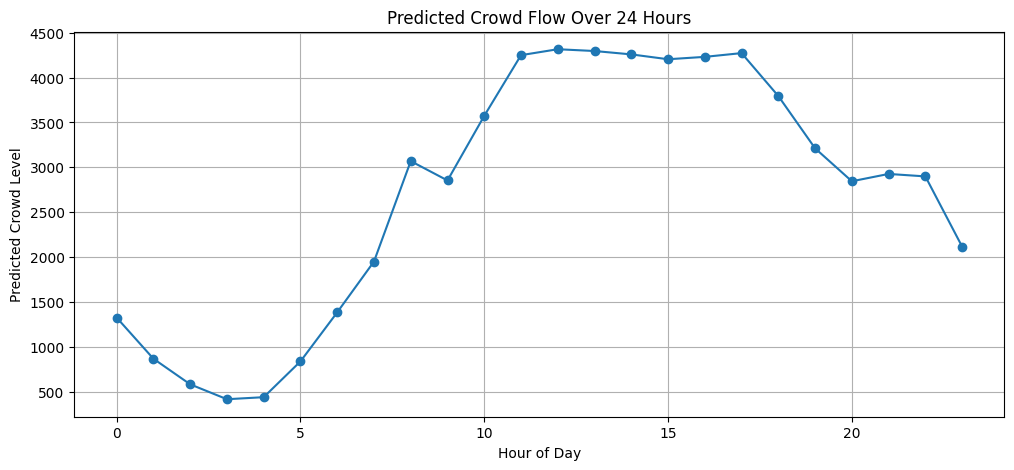

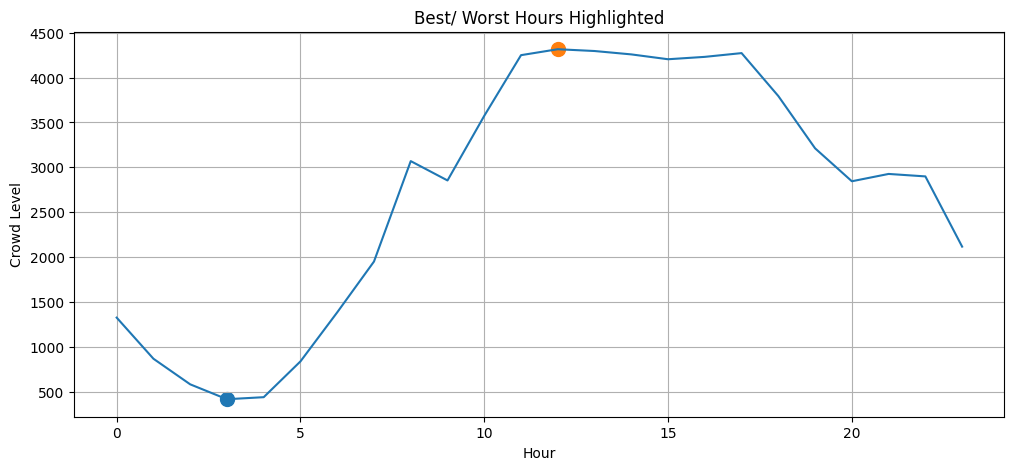

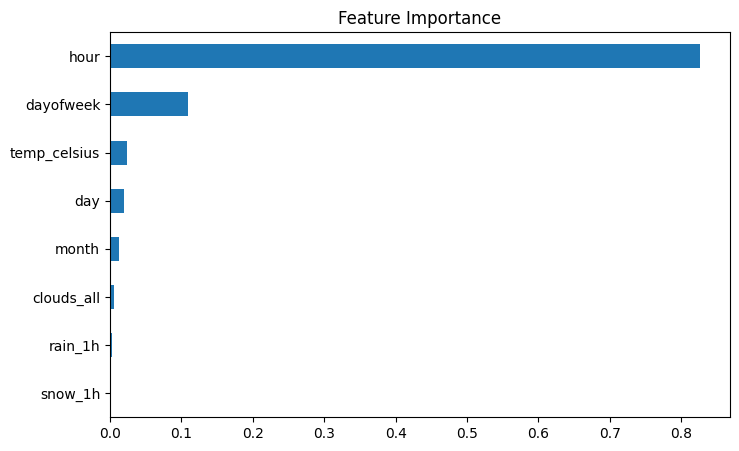

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(day_profile["hour"], day_profile["predicted_crowd"], marker='o')
plt.title("Predicted Crowd Flow Over 24 Hours")
plt.xlabel("Hour of Day")
plt.ylabel("Predicted Crowd Level")
plt.grid(True)
plt.show()
best_hour = day_profile.loc[day_profile['predicted_crowd'].idxmin(), 'hour']
worst_hour = day_profile.loc[day_profile['predicted_crowd'].idxmax(), 'hour']

plt.figure(figsize=(12,5))
plt.plot(day_profile["hour"], day_profile["predicted_crowd"])
plt.scatter(best_hour, day_profile['predicted_crowd'].min(), s=100)
plt.scatter(worst_hour, day_profile['predicted_crowd'].max(), s=100)

plt.title("Best/ Worst Hours Highlighted")
plt.xlabel("Hour")
plt.ylabel("Crowd Level")
plt.grid(True)
plt.show()
import seaborn as sns
importance = pd.Series(best_model.feature_importances_, index=X.columns)
importance.sort_values().plot(kind='barh', figsize=(8,5))
plt.title("Feature Importance")
plt.show()

In [40]:
avg_crowd = day_profile['predicted_crowd'].mean()
print("Average crowd level:", avg_crowd)
print(day_profile[day_profile['predicted_crowd'] > avg_crowd])

Average crowd level: 2704.7284722222225
    temp_celsius  rain_1h  snow_1h  clouds_all  day  hour  month  dayofweek  \
8             30        0        0          40   16     8     11          5   
9             30        0        0          40   16     9     11          5   
10            30        0        0          40   16    10     11          5   
11            30        0        0          40   16    11     11          5   
12            30        0        0          40   16    12     11          5   
13            30        0        0          40   16    13     11          5   
14            30        0        0          40   16    14     11          5   
15            30        0        0          40   16    15     11          5   
16            30        0        0          40   16    16     11          5   
17            30        0        0          40   16    17     11          5   
18            30        0        0          40   16    18     11          5   
19          

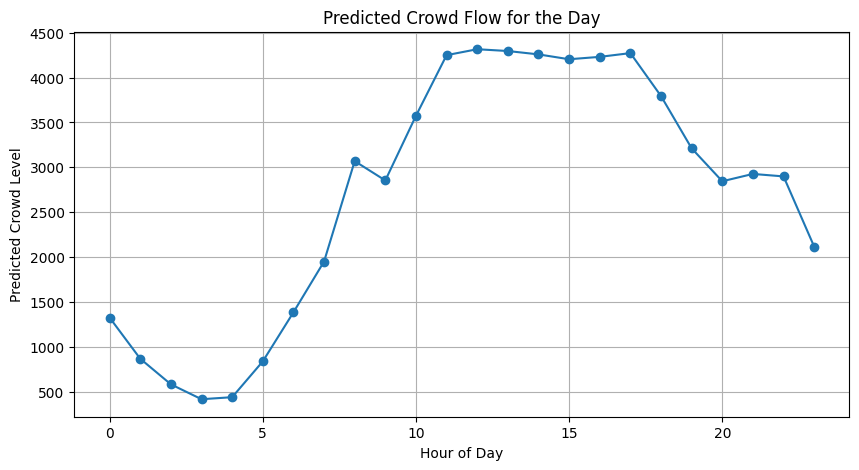

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(day_profile["hour"], day_profile["predicted_crowd"], marker='o')
plt.title("Predicted Crowd Flow for the Day")
plt.xlabel("Hour of Day")
plt.ylabel("Predicted Crowd Level")
plt.grid(True)
plt.show()

In [36]:
day_profile = predict_day_profile(best_model, day=16, month=11)
best_hour = day_profile.loc[day_profile['predicted_crowd'].idxmin(), 'hour']
worst_hour = day_profile.loc[day_profile['predicted_crowd'].idxmax(), 'hour']
print("Best hour to visit:", best_hour)
print("Worst hour to avoid:", worst_hour)

Best hour to visit: 3
Worst hour to avoid: 12


In [35]:
def predict_day_profile(model, day, month, temp=30, rain=0, snow=0, clouds=40):
    hours = list(range(24))
    df_day = pd.DataFrame({
        "hour": hours,
        "temp_celsius": [temp]*24,
        "rain_1h": [rain]*24,
        "snow_1h": [snow]*24,
        "clouds_all": [clouds]*24,
        "day": [day]*24,
        "month": [month]*24,
        "dayofweek": [pd.Timestamp(2024, month, day).dayofweek]*24
    })
    df_day = df_day[model.feature_names_in_]
    df_day["predicted_crowd"] = model.predict(df_day)
    return df_day

In [34]:
import pandas as pd
import numpy as np
def predict_crowd_flow(model, hour, temp, rain, snow, clouds, day, month):
    df_input = pd.DataFrame({
        "temp_celsius": [temp],
        "rain_1h": [rain],
        "snow_1h": [snow],
        "clouds_all": [clouds],
        "day": [day],
        "hour": [hour],
        "month": [month],
        "dayofweek": [pd.Timestamp(2024, month, day).dayofweek]
    })
    df_input = df_input[model.feature_names_in_]
    prediction = model.predict(df_input)[0]
    return prediction

In [29]:
import pandas as pd
import numpy as np
def time_group(h):
    if 6 <= h <= 11:
        return "Morning"
    elif 12 <= h <= 17:
        return "Afternoon"
    elif 18 <= h <= 23:
        return "Evening"
    else:
        return "Night"
X_test["time_group"] = X_test["hour"].apply(time_group)
results = []
for group in X_test["time_group"].unique():
    idx = X_test["time_group"] == group

    y_true_group = y_test[idx]
    y_pred_group = best_model.predict(X_test[idx].drop(columns=["time_group"]))

    mae = mean_absolute_error(y_true_group, y_pred_group)
    rmse = np.sqrt(mean_squared_error(y_true_group, y_pred_group))
    r2 = r2_score(y_true_group, y_pred_group)

    results.append([group, mae, rmse, r2])
fair_df = pd.DataFrame(results, columns=["Time Group", "MAE", "RMSE", "R²"])
print(fair_df)
fairness_gap = fair_df["MAE"].max() - fair_df["MAE"].min()
print("\nFairness Gap (MAE difference):", fairness_gap)

  Time Group        MAE        RMSE        R²
0    Morning  95.144486  181.741399  0.985780
1    Evening  83.145117  135.159871  0.983448
2      Night  25.677061   54.724008  0.994778
3  Afternoon  80.701196  126.369945  0.979856

Fairness Gap (MAE difference): 69.467425191192


In [28]:
peak_hours = sample_day[sample_day["fairness_label"]=="Peak"]["hour"].tolist()
fair_hours = sample_day[sample_day["fairness_label"]=="Fair"]["hour"].tolist()
low_hours = sample_day[sample_day["fairness_label"]=="Low"]["hour"].tolist()

def format_hours(hours):
    if not hours:
        return "None"
    return ", ".join([f"{h}:00" for h in hours])

print("🔴 Peak crowd hours:", format_hours(peak_hours))
print("🟡 Fair visiting hours:", format_hours(fair_hours))
print("🟢 Low crowd hours:", format_hours(low_hours))

🔴 Peak crowd hours: 7:00, 8:00, 9:00, 15:00, 16:00, 17:00
🟡 Fair visiting hours: 5:00, 6:00, 10:00, 11:00, 12:00, 13:00, 14:00, 18:00, 19:00, 20:00, 21:00, 22:00
🟢 Low crowd hours: 0:00, 1:00, 2:00, 3:00, 4:00, 23:00


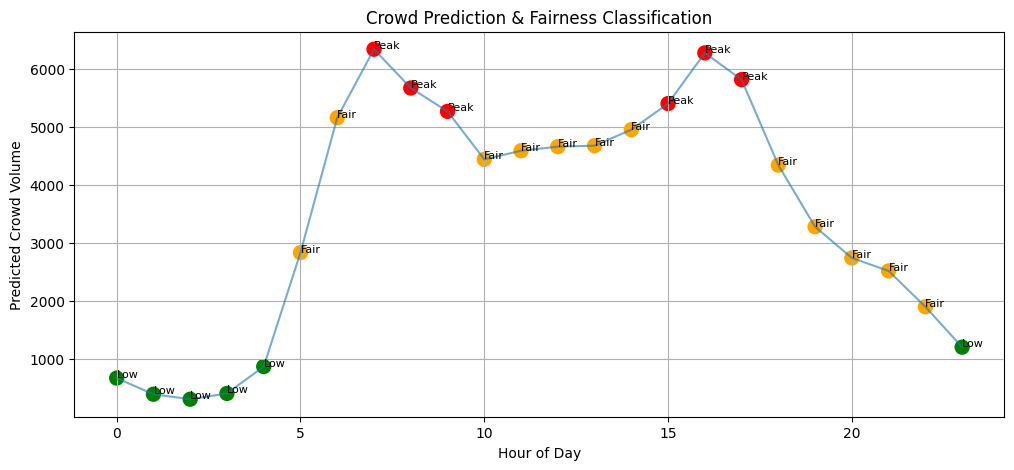

In [27]:
import matplotlib.pyplot as plt
color_map = {"Low": "green", "Fair": "orange", "Peak": "red"}
colors = sample_day["fairness_label"].map(color_map)
plt.figure(figsize=(12,5))
plt.scatter(sample_day["hour"], sample_day["predicted_crowd"],
            c=colors, s=100)
plt.plot(sample_day["hour"], sample_day["predicted_crowd"], alpha=0.6)
plt.xlabel("Hour of Day")
plt.ylabel("Predicted Crowd Volume")
plt.title("Crowd Prediction & Fairness Classification")
plt.grid(True)
for i, label in enumerate(sample_day["fairness_label"]):
    plt.text(sample_day["hour"][i],
             sample_day["predicted_crowd"][i]+10,
             label, fontsize=8)
plt.show()

In [26]:
p25 = sample_day["predicted_crowd"].quantile(0.25)
p75 = sample_day["predicted_crowd"].quantile(0.75)
def label_fairness(value):
    if value < p25:
        return "Low"
    elif value > p75:
        return "Peak"
    else:
        return "Fair"
sample_day["fairness_label"] = sample_day["predicted_crowd"].apply(label_fairness)

In [25]:
import pandas as pd
sample_day = pd.DataFrame({
    "hour": range(24),
    "temp_celsius": [15]*24,
    "rain_1h": [0]*24,
    "snow_1h": [0]*24,
    "clouds_all": [20]*24,
})
sample_day["day"] = 12
sample_day["month"] = 11
sample_day["dayofweek"] = 2
sample_X = sample_day[['temp_celsius','rain_1h','snow_1h','clouds_all','day','hour','month','dayofweek']]
sample_day["predicted_crowd"] = best_model.predict(sample_X)

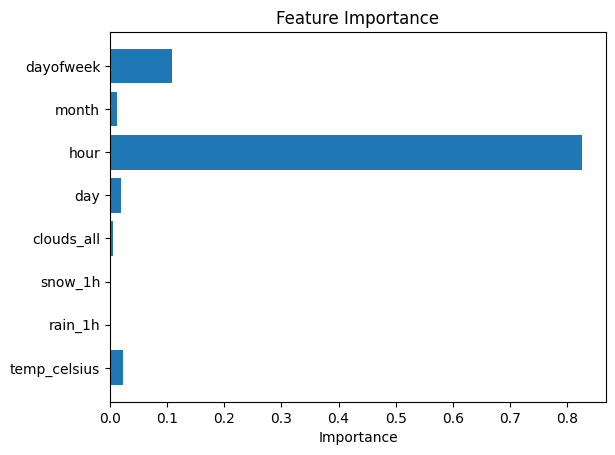

In [23]:
importances = best_model.feature_importances_
features = X.columns
plt.barh(features, importances)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.show()

In [21]:
sample = X.iloc[0:1]
best_model.predict(sample)

array([5460.91666667])

In [20]:
import joblib
joblib.dump(best_model, "traffic_model.pkl")
print("Model saved!")

Model saved!


In [19]:
best_model = RandomForestRegressor(n_estimators=120, random_state=42)
best_model.fit(X, y)

RandomForestRegressor(n_estimators=120, random_state=42)

In [18]:
score_df = r_df.copy()
score_df["MAE_score"] = -score_df["MAE"]
score_df["RMSE_score"] = -score_df["RMSE"]
score_df["R2_score"] = score_df["R²"]
score_df["Total_Score"] = score_df["MAE_score"] + score_df["RMSE_score"] + score_df["R2_score"]
best_model_name = score_df["Total_Score"].idxmax()
print("Best Model Based on Metrics:", best_model_name)
print("\nMetrics of Best Model:\n")
print(r_df.loc[best_model_name])

Best Model Based on Metrics: Random Forest

Metrics of Best Model:

MAE     201.086498
RMSE    365.605213
R²        0.966190
Name: Random Forest, dtype: float64


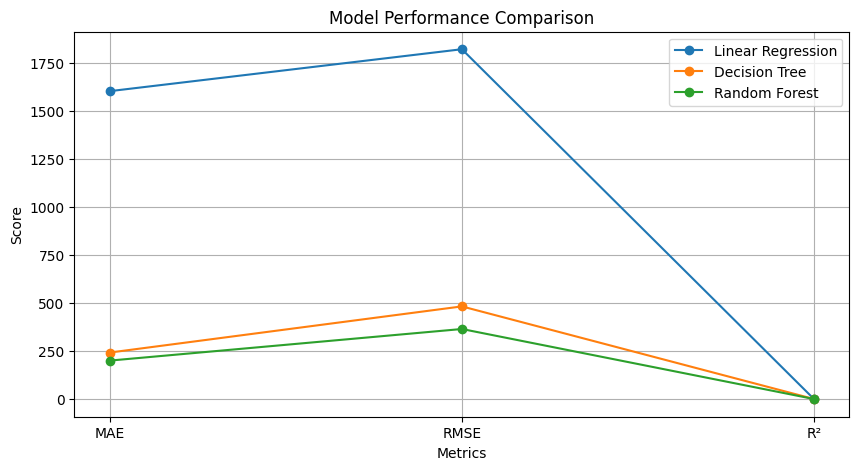

In [17]:
import matplotlib.pyplot as plt
metrics = ["MAE", "RMSE", "R²"]
plt.figure(figsize=(10,5))
for model in r_df.index:
    plt.plot(metrics, r_df.loc[model], marker='o', label=model)
plt.title("Model Performance Comparison")
plt.xlabel("Metrics")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import numpy as np
X=df[['temp_celsius','rain_1h','snow_1h','clouds_all','day','hour','month','dayofweek']]
y=df['traffic_volume']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
models={"Linear Regression":LinearRegression(),"Decision Tree":DecisionTreeRegressor(random_state=42),"Random Forest":RandomForestRegressor(n_estimators=120,random_state=42)}
r={}
for n,m in models.items():
   m.fit(X_train,y_train)
   y_pred=m.predict(X_test)
   mae=mean_absolute_error(y_test,y_pred)
   mse=mean_squared_error(y_test,y_pred)
   rmse = np.sqrt(mse)
   r2=r2_score(y_test,y_pred)
   r[n]=[mae,rmse,r2]
r_df = pd.DataFrame(r, index=["MAE", "RMSE", "R²"]).T

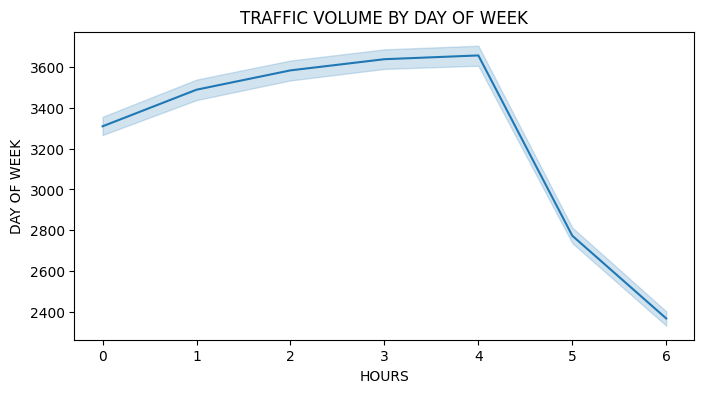

In [ ]:
plt.figure(figsize=(8,4))
sns.lineplot(x="dayofweek",y="traffic_volume",data=df)
plt.xlabel("HOURS")
plt.ylabel("DAY OF WEEK")
plt.title("TRAFFIC VOLUME BY DAY OF WEEK")
plt.show()

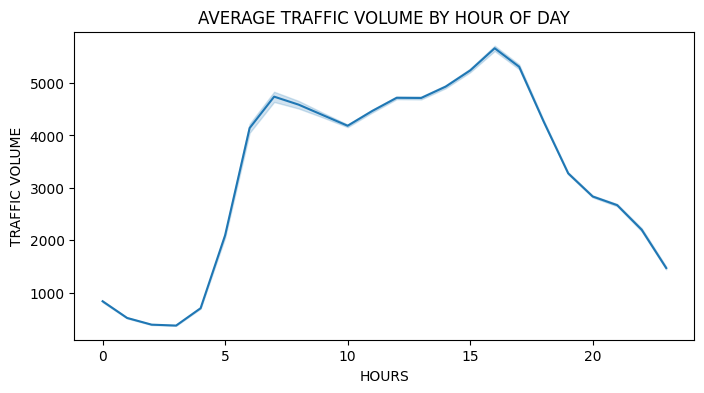

In [ ]:
plt.figure(figsize=(8,4))
sns.lineplot(x="hour",y="traffic_volume",data=df)
plt.xlabel("HOURS")
plt.ylabel("TRAFFIC VOLUME")
plt.title("AVERAGE TRAFFIC VOLUME BY HOUR OF DAY")
plt.show()

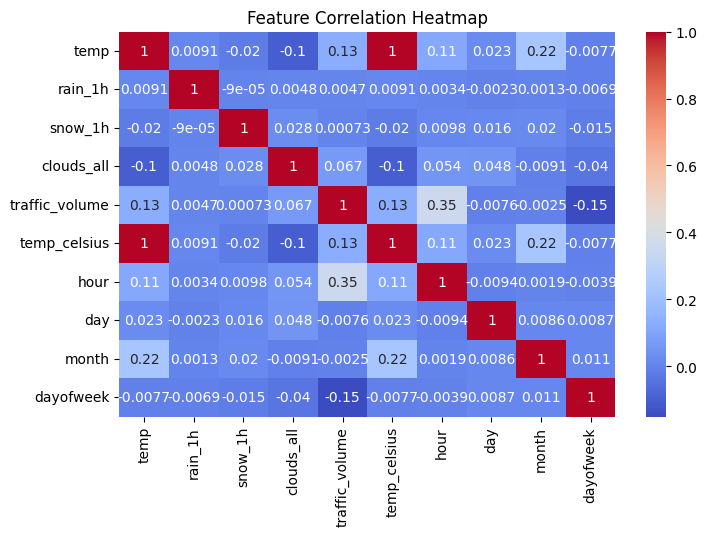

In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
df.head()
df.to_csv("cleaned_crowd_dataset",index=False)

In [11]:
df['date_time']=pd.to_datetime(df['date_time'])
df['temp_celsius']=df['temp']-273.15
df['hour']=df['date_time'].dt.hour
df['day']=df['date_time'].dt.day
df['month']=df['date_time'].dt.month
df['dayofweek']=df['date_time'].dt.dayofweek

In [ ]:
df.isnull().sum()

,0
holiday,48143
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0
date_time,0
traffic_volume,0


In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,281.205870,0.334264,0.000222,49.362231,3259.818355
std,13.338232,44.789133,0.008168,39.015750,1986.860670
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1.000000,1193.000000
50%,282.450000,0.000000,0.000000,64.000000,3380.000000
75%,291.806000,0.000000,0.000000,90.000000,4933.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000


In [ ]:
with zipfile.ZipFile("metro+interstate+traffic+volume (2).zip", "r") as zip_ref:
    print(zip_ref.namelist())


['Metro_Interstate_Traffic_Volume.csv.gz']


In [9]:
import zipfile
with zipfile.ZipFile("metro+interstate+traffic+volume (2).zip", "r") as zp:
  zp.extractall("data")
import pandas as pd
df=pd.read_csv('data/Metro_Interstate_Traffic_Volume.csv.gz')
df.head()


FileNotFoundError: [Errno 2] No such file or directory: 'metro+interstate+traffic+volume (2).zip'

In [5]:
from google.colab import files
uploaded = files.upload()


TypeError: 'NoneType' object is not subscriptable

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

print("✅ All libraries imported successfully!")


✅ All libraries imported successfully!


In [10]:
import pandas as pd

df = pd.concat([X, y], axis=1)
df.head()


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [8]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
metro_interstate_traffic_volume = fetch_ucirepo(id=492)

# data (as pandas dataframes)
X = metro_interstate_traffic_volume.data.features
y = metro_interstate_traffic_volume.data.targets

# metadata
print(metro_interstate_traffic_volume.metadata)

# variable information
print(metro_interstate_traffic_volume.variables)


{'uci_id': 492, 'name': 'Metro Interstate Traffic Volume', 'repository_url': 'https://archive.ics.uci.edu/dataset/492/metro+interstate+traffic+volume', 'data_url': 'https://archive.ics.uci.edu/static/public/492/data.csv', 'abstract': 'Hourly Minneapolis-St Paul, MN traffic volume for westbound I-94. Includes weather and holiday features from 2012-2018.', 'area': 'Other', 'tasks': ['Regression'], 'characteristics': ['Multivariate', 'Sequential', 'Time-Series'], 'num_instances': 48204, 'num_features': 8, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['traffic_volume'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2019, 'last_updated': 'Fri Mar 15 2024', 'dataset_doi': '10.24432/C5X60B', 'creators': ['John Hogue'], 'intro_paper': None, 'additional_info': {'summary': 'Hourly Interstate 94 Westbound traffic volume for MN DoT ATR station 301, roughly midway between Minneapolis and St Paul, MN. Hourly weath

In [7]:
pip install ucimlrepo

In [ ]:
pip install pandas numpy matplotlib seaborn scikit-learn